# **GEOSPATIAL ANALYSIS OF VOICE CALL QUALITY AND CUSTOMER EXPERIENCE FOR DIFFERENT TSP'S ACROSS INDIA USING PYTHON**

---



---





# **Objective**

Analysis of Voice Call Quality and Customer Experience across TSP's - IDEA, AIRTEL, and RJIO.


> 


---

# **Introduction** 

---



Voice calling is the ability to contact and converse with people in real-time with a telephone/ mobile. Voice interactions give more insight into conversations than any other communication channels. With voice communications, a person’s tone, inflection, and emotions come through, providing greater context, and meaning. 

To get the idea of which Telecom Service Provider in India provided best service in 2020 the analysis of Voice Call Quality from customer feedbacks for the year 2020 is done. The data is taken from Open Government Data Platform India, a Gov. of India's official website. The analysis is done for Idea, Airtel, and RJio TSP. 

Python, a high-level programming language is used to deal with large dataset, analyse it and communicate the analysis via Exploratory Data Analysis.






## **Data Analysis**

---
---



## **Imports**

---



Operation 1




In [ ]:
pip install geopandas  

In [ ]:
from typing import ValuesView
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px

## **Data Sources**

---


 
>The required data was taken from the following sources:

>1. https://data.gov.in/catalog/voice-call-quality-customer-experience?page=1# - Voice call quality customer experience data of 2020.
2. https://geographicalanalysis.com/download-free-india-shapefile-including-kashmir-and-ladakh/ - Indian state shape file.




---



## **Data Wrangling**

---

Voice Call Quality: 
1. Original Data 
    - The data about Voice Call Quality for each month of 2020 is in separate .csv files. Each row is representing customer feedback. 
    - Size of the data frame = 168481 rows × 9 columns 
    - The data includes the following columns:
    - data.columns = ['Operator', 'In Out Travelling', 'Network Type', 'Rating', 'Call Drop Category', 'Latitude', 'Longitude', 'State Name'] 
2. Derived Data From the original data about Voice Call Quality, data calculated is what follows: 
    - Mean rating of respective mode across all TSP's and for individual TSP. 
    - Count and percentage of each Call_Drop_Category for all TSP's and for individual TSP. 
    - Count and percentage of no. of feedbacks corresponding to the TSP. 
    - Mean of rating with respect to respective TSP throughout the year. 
    - Mean of rating with respect to respective TSP month wise. 
    - Mean of rating with respect to State Names throughout the year.

Indian State Shape 
>In order to analyse the data by state, we download a list with states of India and there shape geometry.









### ***Data Loading***

The data is transformed from the csv file to a dataframe, one additional column is created and particular month is the value assigned. It is then appended in one list. 
New dataframe is created by concatenating the list at axis=0.  

Operation 2

In [ ]:
from google.colab import drive       # import data from google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Operation 3

In [ ]:
d = []

months = ['January','February','March','April','May','June','July','August','September','October','November','December']

for month in months:
    df = pd.read_csv(f"/content/drive/MyDrive/2020/MyCall_Data_{month}_2020.csv", index_col=None, header=0)
    df["months"] = month 
    d.append(df)


data = pd.concat(d, axis=0, ignore_index=True)
data

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name,months
0,RJio,Indoor,4G,5,Satisfactory,-1.000000,-1.000000,NaN,January
1,RJio,Indoor,4G,5,Satisfactory,-1.000000,-1.000000,NaN,January
2,RJio,Outdoor,4G,1,Call Dropped,28.237968,76.832227,Rajasthan,January
3,Airtel,Indoor,4G,5,Satisfactory,-1.000000,-1.000000,NaN,January
4,Vodafone,Indoor,Unknown,1,Call Dropped,-1.000000,-1.000000,NaN,January
...,...,...,...,...,...,...,...,...,...
168476,RJio,Outdoor,Unknown,4,Satisfactory,-1.000000,-1.000000,NaN,December
168477,RJio,Indoor,Unknown,5,Satisfactory,-1.000000,-1.000000,NaN,December
168478,Airtel,Indoor,Unknown,4,Satisfactory,22.741261,75.815521,Madhya Pradesh,December
168479,Airtel,Indoor,4G,4,Satisfactory,22.741269,75.815528,Madhya Pradesh,December


### ***Data cleaning***
>* Columns renamed to replace space with column names with "_".
>* Rows having undesired values dropped.
>* Analysis is of only 3 TSP's, deleted the rows corresponding to remaining operators.
>* Reset index 
>* Renamed the index column to "Customer_ID".





Operation 4

In [ ]:
data.columns = ['Operator','In_Out_Travelling', 'Network_Type', 'Rating','Call_Drop_Category','Latitude','Longitude','State_Name','Month'] 
f_1 = data[data.Network_Type != 'Unknown'].dropna()
vq_data = f_1.drop(f_1[f_1.Operator.isin(['Tata', 'Other', 'MTNL', 'Vodafone', 'BSNL'])].index) 
vq_data.reset_index(level=0, inplace=True, drop=True)
vq_data.index = vq_data.index + 1 
vq_data.index.names = ['Customer_ID']
vq_data.reset_index( inplace=True )
vq_data.head()

,Customer_ID,Operator,In_Out_Travelling,Network_Type,Rating,Call_Drop_Category,Latitude,Longitude,State_Name,Month
0,1,RJio,Outdoor,4G,1,Call Dropped,28.237968,76.832227,Rajasthan,January
1,2,RJio,Indoor,4G,4,Satisfactory,22.673484,88.490379,West Bengal,January
2,3,Airtel,Indoor,4G,5,Satisfactory,12.879084,77.724270,Karnataka,January
3,4,RJio,Indoor,4G,5,Satisfactory,25.281607,83.123418,Uttar Pradesh,January
4,5,RJio,Indoor,4G,5,Satisfactory,25.284936,83.127254,Uttar Pradesh,January


## **Exploratory Data Analysis**

---


Total 6 plots are plotted to analyse the data of Voice Call Quality:

1.   Call Quality Rating,
2.   Call Quality Experience,
3.   Number of Customer Feedback %,
4.   Comparison  Of Voice Call Quality Across TSP's,
5.   Voice Call Quality Rating Throughout the Year 2020 and,
6.   Call Quality Rating State Wise.


For each plot:

1.  the required data calculated and
2.	then exploratory data visualisation is done.




### **1. Call Quality Rating**

>Voice call quality rating mean is taken for each mode corresponding to all TSP's and individual TSP.

>Library used - 

>*  Matplotlib
>*   Palettable - python color library used for plots plotted with Matplotlib.

>Visualization - Donut plot


Operation 5-6

In [ ]:
print("\033[1m" + "Call Quality Rating Data:")
print()
in_out_modes = list(set(vq_data['In_Out_Travelling']))
mode_rating = np.empty(len(in_out_modes), dtype=np.float64)
for i, mode in enumerate(in_out_modes):
    mode_rating[i] = vq_data.loc[vq_data['In_Out_Travelling']== mode, 'Rating'].mean().round(1)
mode_rating_inv = np.array(5-mode_rating).round(1)
In_out_travelling = np.stack((mode_rating, mode_rating_inv), axis=0)
index_names = ["Rating","Rating_inv"]
print("\033[1m" + "All Operators")
rating = pd.DataFrame(data = In_out_travelling, index =index_names, columns = in_out_modes)
display(rating.head(1))
print()

operators = ["Airtel", "Idea", "RJio"]
r_op_data = []
for operator in operators:
    rating_s = np.empty(len(in_out_modes), dtype=np.float64)
    data = vq_data[vq_data['Operator'] == operator]
    for i, mode in enumerate(in_out_modes):
        rating_s[i] = data.loc[data['In_Out_Travelling']== mode, 'Rating'].mean().round(1)
    rating_s_inv = np.array(5-rating_s).round(1)
    In_out_travelling = np.stack((rating_s, rating_s_inv), axis=0)
    index_names = ["Rating","Rating_inv"]
    rating_s = pd.DataFrame(data = In_out_travelling, index=index_names, columns = in_out_modes)
    r_op_data.append(rating_s)

for i, op_df in enumerate(r_op_data):
  print()
  print("\033[1m" + operators[i])
  display(op_df.head(1))
  print()

Call Quality Rating Data:

All Operators


,Travelling,Indoor,Outdoor
Rating,3.8,3.7,3.4




Airtel


,Travelling,Indoor,Outdoor
Rating,3.5,3.6,2.8




Idea


,Travelling,Indoor,Outdoor
Rating,4.6,4.5,4.3




RJio


,Travelling,Indoor,Outdoor
Rating,3.6,3.4,3.4


Operation 7-8

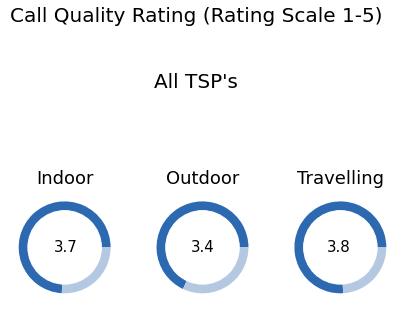

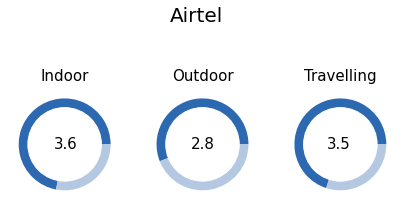

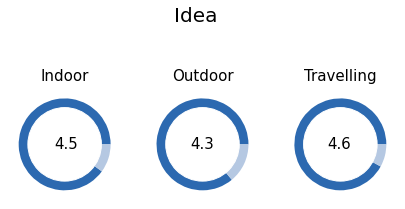

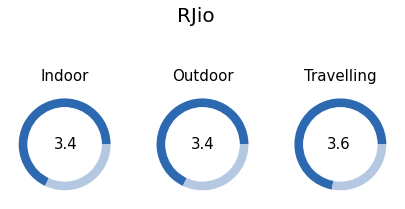

In [ ]:
from palettable.tableau import BlueRed_12        # color librabry for python   
fig, ax = plt.subplots(figsize=(7,7))

CD_Category = ["Indoor", "Outdoor", "Travelling"]

for i, cd in enumerate(CD_Category):             # all tsp
    plt.subplot(1,3,i+1)
    plt.pie(rating[cd]	, colors=BlueRed_12.hex_colors, startangle = 0)
    central_circle = plt.Circle((0, 0), 0.8, color='white')
    fig = plt.gcf()                              # gets current axes
    fig.gca().add_artist(central_circle)         # superimpose created central_circle on pie chart... both makes a donut.
    plt.title(cd,fontsize=18)
    plt.text(0.15 + i*0.35 , 0.5 , rating[cd][0] , transform = ax.transAxes, va = 'center', ha = 'center', fontsize=15) 

plt.suptitle("Call Quality Rating (Rating Scale 1-5)\n\n\nAll TSP's", fontsize=20)

for j, op in enumerate(operators):               # each tsp
  fig, ax = plt.subplots(figsize=(7,4))  
  fig.suptitle(op, fontsize=20, )
  for i, cd in enumerate(CD_Category):
      plt.subplot(1,3,i+1)
      plt.pie(r_op_data[j][cd]	, colors=BlueRed_12.hex_colors, startangle = 0)
      central_circle = plt.Circle((0, 0), 0.8, color='white')
      fig = plt.gcf()
      fig.gca().add_artist(central_circle)
      plt.title(cd,fontsize=15)
      plt.text(0.15 + i*0.35, 0.5, r_op_data[j][cd][0], transform = ax.transAxes, va = 'center', ha = 'center', fontsize=15)


plt.show()

Call quality rating is high in travelling mode amongst all modes for all TSP's as well as individual TSP's.
Idea is having good rating for all the modes among all the TSP's.

### **2. Call Quality Experience**

>Call quality experience of customers is visualised by taking the % of entries of call drop category across all TSP's and individual ones.

>Library Used - Matplotlib, Plalettable

>Visualization by - Pie plot






Operation 9

In [ ]:
operators = ["Airtel", "Idea", "RJio"]

All_Op = vq_data.groupby('Call_Drop_Category').size().sort_values(ascending=False).reset_index(name="All_TSPs")               

print("\033[1m" + "Call Quality Experience Data:")
print()

display(All_Op)
print()

cdc_op_data = []
for i,op in enumerate(operators):
    cdc_data = vq_data[vq_data.Operator == op].groupby('Call_Drop_Category').size().sort_values(ascending=False).reset_index(name=op)
    cdc_op_data.append(cdc_data)

for i, cdc_op_df in enumerate(cdc_op_data):                
  print()
  display(cdc_op_df)
  print()

Call Quality Experience Data:



,Call_Drop_Category,All_TSPs
0,Satisfactory,52211
1,Poor Voice Quality,15618
2,Call Dropped,7399


,Call_Drop_Category,Airtel
0,Satisfactory,15718
1,Poor Voice Quality,6397
2,Call Dropped,3563


,Call_Drop_Category,Idea
0,Satisfactory,14179
1,Poor Voice Quality,1248
2,Call Dropped,686


,Call_Drop_Category,RJio
0,Satisfactory,22314
1,Poor Voice Quality,7973
2,Call Dropped,3150


Operation 10

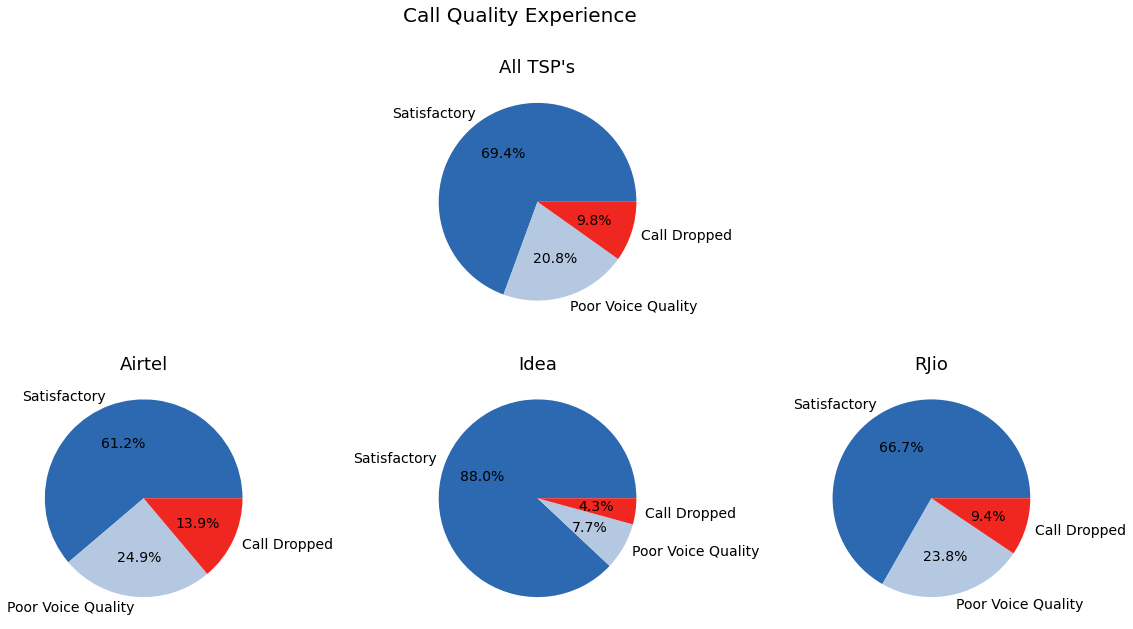

In [ ]:
plt.subplots(figsize=(20,10))                             

Call_Drop_Category = ["Satisfactory","Poor Voice Quality","Call Dropped"]

plt.subplot(2,1,1)                                                       
plt.pie(All_Op.All_TSPs, labels=Call_Drop_Category, autopct='%1.1f%%', textprops={'fontsize': 14}, colors=BlueRed_12.hex_colors)
plt.title("All TSP's", fontdict={'fontsize': 18})

for i,op in enumerate(operators):
    plt.subplot(2,3,i+4)
    plt.pie(cdc_op_data[i][op], labels = Call_Drop_Category , autopct='%1.1f%%', textprops={'fontsize': 14}, colors=BlueRed_12.hex_colors)
    plt.title(op, fontdict={'fontsize': 18})

plt.suptitle("Call Quality Experience", fontsize=20)

plt.show()


Customers are satisfied with voice call quality provided by Idea operator. Airtel is having highest % of call dropped. 

### **3. Number of Customer Feedback**
Percentage of value count is calculated of all operators. 




 

Operation 11

In [ ]:
Feedback = vq_data['Operator'].value_counts()
Feedback_df = pd.DataFrame(data= Feedback.values,index=Feedback.index ,columns=["No_Of_Feedbacks"])
Feedback_df['Percentage'] = (Feedback_df['No_Of_Feedbacks'] / Feedback_df['No_Of_Feedbacks'].sum()) * 100
Feedback_df['Percentage'] = Feedback_df['Percentage'].round(2)
Feedback_df

,No_Of_Feedbacks,Percentage
RJio,33437,44.45
Airtel,25678,34.13
Idea,16113,21.42


Operation 12

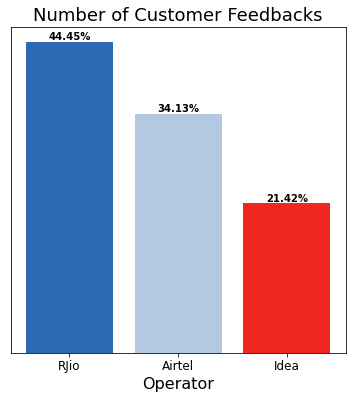

In [ ]:
plt.figure(figsize=(6,6))
Feedback_df_plot = plt.bar(Feedback_df.index, Feedback_df.No_Of_Feedbacks, color=BlueRed_12.hex_colors)
plt.title("Number of Customer Feedbacks", fontdict={'fontsize': 18})

i = 0
for p in Feedback_df_plot:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(Feedback_df.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.xticks(fontsize=12)
plt.xlabel("Operator", fontsize=16)
plt.yticks([])
plt.show()


The data collected from customer is dominated by RJio in numbers.


### **4. Comparison of Voice Call Quality Across TSP's**

Average rating of each operator over the year data is visualised.




Operation 13

In [ ]:
Average = vq_data.groupby('Operator')['Rating'].mean().round(2).sort_values(ascending=False)
Average_db = pd.DataFrame(data=Average.values, index=Average.index, columns=["Avg_Rating"])
Average_db

,Avg_Rating
Operator,
Idea,4.43
Airtel,3.40
RJio,3.38


Operation 14

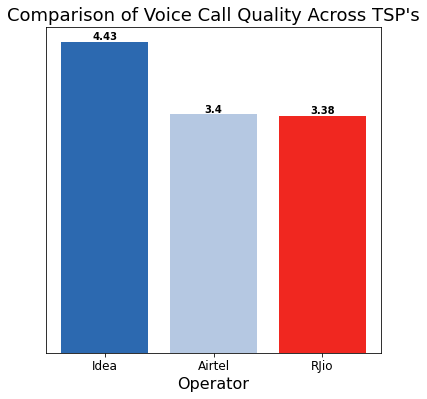

In [ ]:
plt.figure(figsize=(6,6))
Average_df_plot = plt.bar(Average_db.index, Average_db.Avg_Rating, color=BlueRed_12.hex_colors)
plt.title("Comparison of Voice Call Quality Across TSP's", fontdict={'fontsize': 18}) 
i=0
for a in Average_df_plot:
    width = a.get_width()
    height = a.get_height()
    x, y = a.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(Average_db.Avg_Rating[i]),
             ha='center',
             weight='bold')
    i+=1
plt.xticks(fontsize=12)
plt.xlabel("Operator", fontsize=16)
plt.yticks([])    
plt.show()


### **5. Voice Call Quality Rating Throughout Year 2020**

The average rating of every month for each operator is visualised. The visualisation shows the performance of the operator over the months.

Library - Plotly.express

Visualisation - Interactive line plot.


Operation 15

In [ ]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

month_wise = np.empty((len(months), len(operators)))
for i, m in enumerate(months):
    m_df = vq_data[vq_data["Month"] == m]
    temp = m_df.groupby("Operator")["Rating"].mean().round(2)
    month_wise[i, :] = np.array(temp)
month_wise_df = pd.DataFrame({"Month": months})
month_wise_df[operators] = month_wise
print("\033[1m"+"Voice Call Quality Rating Throughout the Year 2020")
month_wise_df.head()

Voice Call Quality Rating Throughout the Year 2020


,Month,Airtel,Idea,RJio
0,January,3.49,2.72,3.31
1,February,3.42,3.13,3.29
2,March,3.64,2.40,3.24
3,April,3.60,2.99,3.09
4,May,3.39,2.77,3.53


Operation 16-17

In [ ]:
fig = px.line(month_wise_df, x='Month', y=['Idea', 'RJio', 'Airtel'], title="Voice Call Quality Rating Throughout the Year 2020.")
fig.update_traces(mode="markers+lines")
names = {'variable':'Operator'}
fig.for_each_trace(lambda t: t.update(hovertemplate = t.hovertemplate.replace('variable', names['variable'])))
fig.update_layout( xaxis_title="Month",
    hovermode="x unified",
    yaxis_title="Rating",
    legend_title_text = names['variable'],
    legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()

Operator Idea can be seen to have improved its service as per the customer feedbacks. Rating of RJio is consistent throughout the year.

### **6. Call Quality Rating State Wise**

Avg rating is calculated with respect to state and state names are replaced as per the Indian State Shape File.

Library - Geopandas (reads the shape file)

Visualisation - Choropleth map



Operation 18

In [ ]:
results = vq_data.groupby('State_Name')['Rating'].mean()
Rating_State_df = pd.DataFrame({"Avg_Rating": results})
replace = ["Tamil Nadu", "Dadra and Nagar Haveli and Daman and Diu", "Chhattisgarh", "Telangana", "Andaman and Nicobar"]
replace_with = ["Tamilnadu", "Daman and Diu and Dadra and Nagar Haveli", "Chhattishgarh", "Telengana", "Andaman & Nicobar" ]
Rating_State_df.reset_index(inplace=True)
Rating_State_df['State_Name'].replace(replace, replace_with,inplace=True )
display(Rating_State_df.head())

,State_Name,Avg_Rating
0,Andaman & Nicobar,2.375000
1,Andhra Pradesh,3.736780
2,Arunachal Pradesh,2.333333
3,Assam,2.567879
4,Bihar,3.213431


Operation 19

In [ ]:
# reading the shp file and merging the avg ratring data with the shp file

fp = "/content/drive/MyDrive/2020/India_State_Shapefile/India_State_Boundary.shp"
map_df = gpd.read_file(fp)
merged = map_df.set_index('Name').join(Rating_State_df.set_index('State_Name'))
merged_inner = pd.merge(left=map_df, right=Rating_State_df, left_on='Name', right_on='State_Name', how='outer')
merged_inner.head()

,Name,Type,geometry,State_Name,Avg_Rating
0,West Bengal,State,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...",West Bengal,3.800971
1,Andaman & Nicobar,Union Territory,"MULTIPOLYGON (((92.90124 12.91071, 92.90157 12...",Andaman & Nicobar,2.375000
2,Chandigarh,Union Territory,"POLYGON ((76.77232 30.79420, 76.77286 30.79343...",Chandigarh,1.533333
3,Daman and Diu and Dadra and Nagar Haveli,Union Territory,"MULTIPOLYGON (((72.96339 20.33227, 72.96390 20...",Daman and Diu and Dadra and Nagar Haveli,2.500000
4,Delhi,Union Territory,"POLYGON ((77.10591 28.87005, 77.10668 28.86989...",Delhi,2.162712


Operation 20 






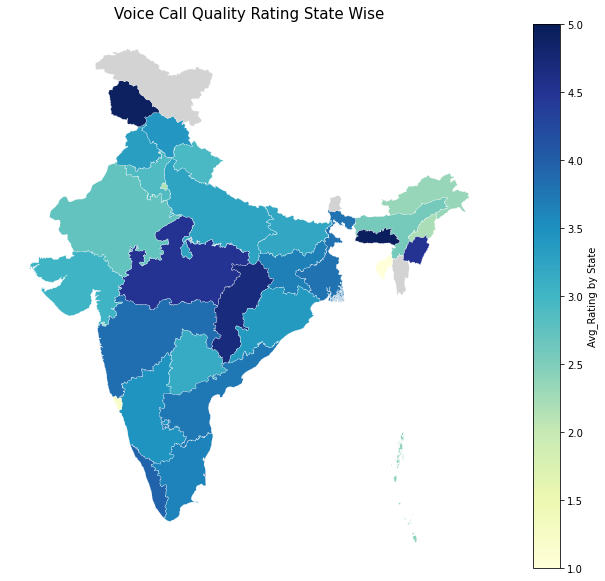

In [ ]:
fig, ax = plt.subplots(1, figsize=(15, 10))
ax.axis('off')
ax.set_title('Voice Call Quality Rating State Wise', fontdict={'fontsize': '15', 'fontweight' : '3'})

merged.plot(column='Avg_Rating', 
            cmap= "YlGnBu", 
            linewidth=0.2, 
          ax=ax, edgecolor='1',
          legend=True, legend_kwds=
          {'label': "Avg_Rating by State",
          'orientation': "vertical"},
          missing_kwds={
          "color": "lightgrey",
          "label": "Missing values",
    },)
fig.show()


The data of some states is not available, those states are filled with light grey colour. 

The data visualisation inference:
* The voice call quality rating is low in East States of India.
* Middle states have the best ratings.
* South rating is moderate.
* Kashmir is having the best rating.



# **Conclusion**


---



With visuals obtained we can clearly state TSP - Idea was able to satisfy customers with its good voice call quality. Airtel needs to improve its service to stay in league. RJio is consistent with its voice quality service.
Since, the mean of rating was taken into consideration the analysis stays true to its nature. 